#　1週目

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
from scipy.optimize import curve_fit

## 課題１

---

## 課題２

In [3]:
df = pd.read_csv("DataSet/day1_data2.csv")
df.head()

,upper_level(mV),lower_level(mV),time(s),count,K
0,-50,-130,2.44,50,20.492
1,-130,-210,80.76,50,0.619
2,-210,-290,146.45,50,0.341
3,-290,-370,111.96,15,0.134


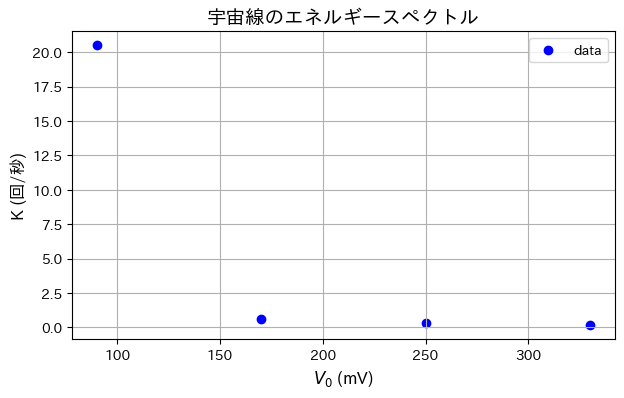

In [4]:
#曲線フィット
x = np.abs((df["upper_level(mV)"] + df["lower_level(mV)"]) / 2)
y = df["K"]

plt.figure(figsize=(7, 4))
plt.scatter(x, y, label='data', color='blue') 
plt.xlabel('$V_0$ (mV)', fontsize=12)
plt.ylabel('K (回/秒)', fontsize=12)
plt.title('宇宙線のエネルギースペクトル', fontsize=14)
plt.legend()
plt.grid(True)
#plt.savefig("fig1-2-1.png")
plt.show()

近似式: y = 387176470.1817 x^-3.8005


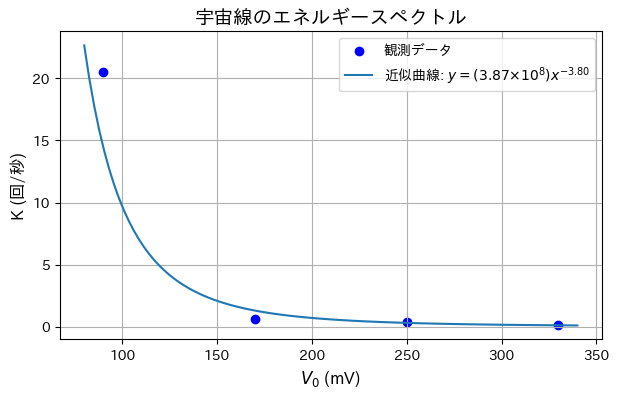

In [11]:
#累乗曲線近似
log_x = np.log(x)
log_y = np.log(y)

coeffes = np.polyfit(log_x, log_y, 1)
b = coeffes[0]
log_a = coeffes[1]
a = np.exp(log_a)

print(f"近似式: y = {a:.4f} x^{b:.4f}")

#表示
x_fit = np.linspace(min(x)-10, max(x)+10, 100)
y_fit = a * x_fit**b

plt.figure(figsize=(7, 4))
plt.scatter(x, y, label='観測データ', color='blue') 
plt.plot(x_fit, y_fit, label='近似曲線: $y = (3.87×10^8) x^{-3.80}$')
plt.xlabel('$V_0$ (mV)', fontsize=12)
plt.ylabel('K (回/秒)', fontsize=12)
plt.title('宇宙線のエネルギースペクトル', fontsize=14)
plt.legend()
plt.grid(True)
#plt.savefig("fig1-2-2.png")
plt.show()